# Probability distribution of wigner function using angle theta

##### First we import the necessary packages

In [330]:
import qutip as qt
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.integrate import quad
import math as mt
import random

In [331]:
N = 20

rho_coherent = qt.coherent_dm(N, np.sqrt(2))

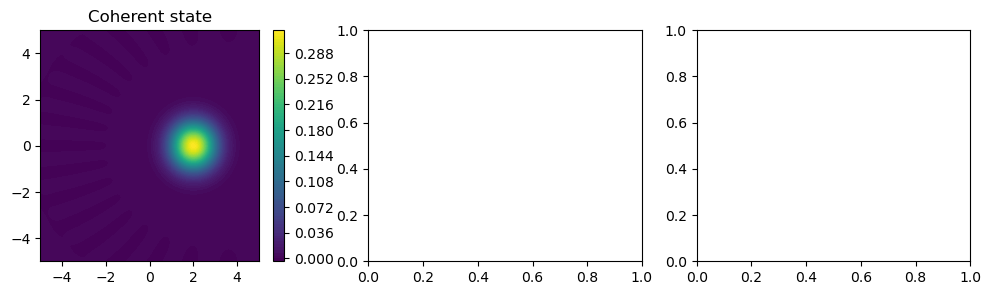

In [332]:
xvec = np.linspace(-5,5,200)

W_coherent = qt.wigner(rho_coherent, xvec, xvec)

fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cbar = plt.colorbar(cont0)

plt.show()

##### Now we want to derive the probability distribution along different angles at x=0

In [333]:
# We initialize the array for all the data of theta=0

sum = 0
y_val = 100

W0 = W_coherent[y_val]

x_theta0 = [i * 0. for i in range(len(W0))]
x_theta0 = np.array(x_theta0)

# We update each element to the integration value

for i in range(len(W0)):
    sum += W0[i]

for i in range(len(W0)):
    x_theta0[i] = sum

##### We define the Wigner function. Below the coherent state is shifted by 45 degrees

In [334]:
N = 20

rho_coherent = qt.coherent(N, np.sqrt(2))

def rot(theta):
    return (1j*theta*qt.num(N)).expm()

# 1j is just i and rho_coherent is a vector (can be rotated as such)

W_coherent = qt.wigner(rot(mt.pi/4)*rho_coherent, xvec, xvec)


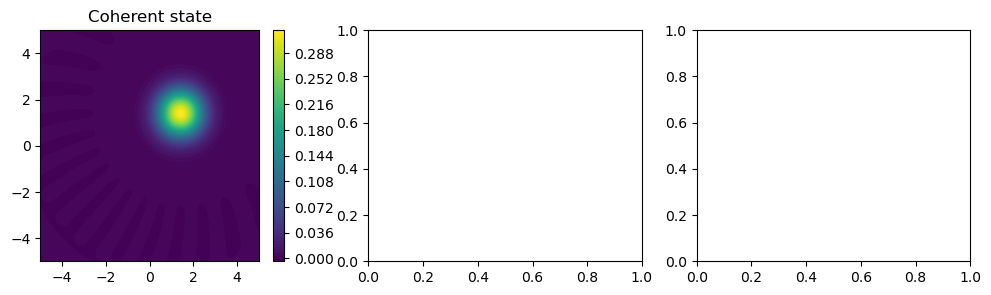

In [335]:
fig, axes = plt.subplots(1, 3, figsize=(12,3))

cont0 = axes[0].contourf(xvec, xvec, W_coherent, 100)
lbl0 = axes[0].set_title("Coherent state")
cbar = plt.colorbar(cont0)

plt.show()

In [336]:
# We store the x-values for theta=45 in the variable x_45

x_45 = [np.sum(W_coherent[:,i]) for i in range(len(W_coherent[0]))]
x_45 = np.array(x_45)

##### We can do this process for different values of theta

In [337]:
dir_thetas = [0,30,60,90,120,150,180]
thetas = [i*mt.pi/180 for i in dir_thetas]

N_thetas = len(thetas)

W_coherents = [0]*N_thetas

# xs contains all the x values for different values of theta

xs = np.zeros((N_thetas,len(W_coherent[0])))

for i in range(N_thetas):
    W_coherents[i] = qt.wigner(rot(thetas[i])*rho_coherent, xvec, xvec)
    cohe = W_coherents[i]
    seq = [np.sum(cohe[:,j]) for j in range(len(W_coherents[0][0]))]
    seq = np.array(seq)
    xs[i] = seq


##### Below, the values of p(x_theta) are shown for the different values of theta

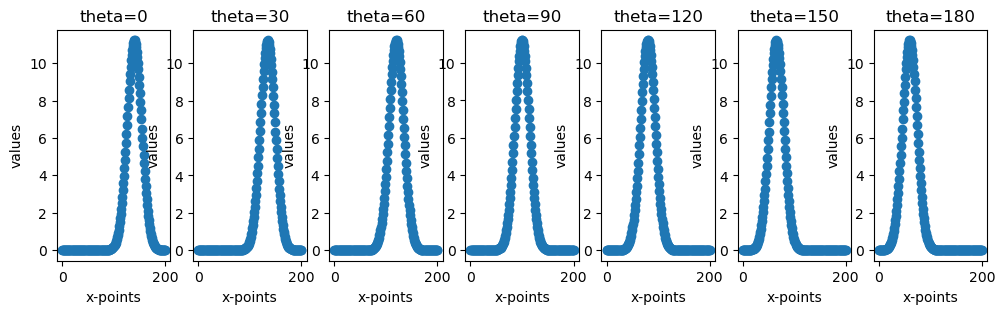

In [338]:
fig, axes = plt.subplots(1, 7, figsize=(12,3))

x_val = np.linspace(0,200,200)

scat0 = axes[0].scatter(x_val, xs[0])
scat1 = axes[1].scatter(x_val, xs[1])
scat2 = axes[2].scatter(x_val, xs[2])
scat3 = axes[3].scatter(x_val, xs[3])
scat4 = axes[4].scatter(x_val, xs[4])
scat5 = axes[5].scatter(x_val, xs[5])
scat6 = axes[6].scatter(x_val, xs[6])

i = 0

for ax in axes.flat:
    ax.set(xlabel='x-points', ylabel='values', title='theta=' + str(dir_thetas[i]))
    i+=1

plt.show()

##### Now that we have different probability distributions for x we can use the rejection sampling technique

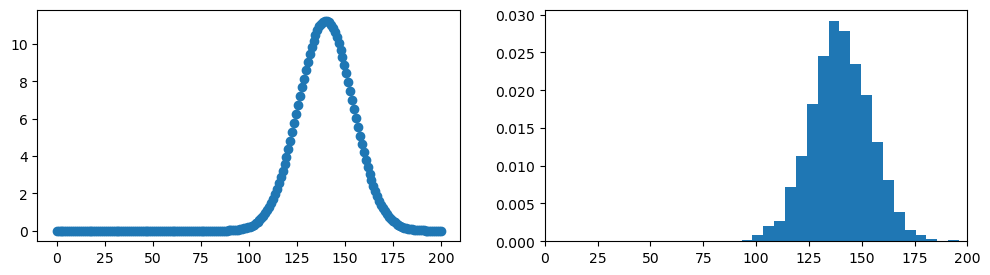

In [339]:
# This sampling method can be done with any of the probability distributions calculated above

max_val = max(xs[0])
values = []

# Number of iterations for the sample-gathering

iter = 100

for j in range(iter):
    for i in range(len(xs[0])):
        rand_y = random.uniform(0,max_val)
        rand_x = random.uniform(0,200)
        if rand_y < xs[0][int(rand_x)]:
            values.append(rand_x)

values = np.array(values)

fig, axes = plt.subplots(1, 2, figsize=(12,3))

scat0 = axes[0].scatter(x_val, xs[0])
hist1 = axes[1].hist(values,bins=20, density=True)

plt.xlim(0,200)
plt.show()

# Definition of Likelyhood-function

##### With the Likelyhood function we take as input a state operator (in this first case we know the state operator) and compute value. This value is largest for the correct state operator.

In [340]:
sample = np.histogram(values,bins=100,density=True)

In [342]:
# Definition of the likelyHood-function

def likelyHood(pr,f):
    product = 1.
    for j in range(len(f)):
        product *= pr[j]**f[j]
    return product

In [341]:
# From our artificial sample we generate the number of occurences, f, and the probabilities derived using
# the coherent state operator rho and the project (length of each bar in the plot).

f = sample[0]

proj = sample[1]

# Here we update proj to show the length of each bin

for i in range(len(proj)-1):
    proj[i] = proj[i+1] - proj[i]

# We resize proj to match the dimension of rho

proj = np.resize(proj,len(proj)-1-80)

# We convert rho_coherent from type Qobj to type numpy array

rho_coherent = rho_coherent.full()
rho_coherent = np.array(rho_coherent)

# Now we dot these operators (take the trace)

Pr = np.dot(proj,rho_coherent)

# Since we only get one value, we make a list of the same value with dimensions equal to f

Pr_list = np.zeros(len(f))

for i in range(len(f)):
    Pr_list[i] = np.real(Pr[0])

# Now we can compute the likelyhood function

L = likelyHood(Pr_list,f)

print(L)

2.5492450608586807
